#### Start by importing reader and writer classes from the PyPDF2 library

In [1]:
% matplotlib inline
import numpy as np
from PyPDF2 import PdfFileReader, PdfFileWriter
import matplotlib.pyplot as plt

In [2]:
reader = PdfFileReader("E://DD/texts_Statistics/R. Mead, S. G. Gilmour, A. Mead Statistical Principles for the Design of Experiments Applications to Real Experiments.pdf", 'r')

Save the file as reader object. We can get the basic information about the file such as the one below:

In [3]:
print("Page layout is: ", reader.getPageLayout())
print("Total number of pages is: ", reader.getNumPages())
print("Document information is: ", reader.getDocumentInfo())
print("Document fields are: ", reader.getFields())
# print("Document outlines correspond to: ", reader.getOutlines()) # This generates a lot of output
print("The page mode is: ", reader.getPageMode())

Page layout is:  /SinglePage
Total number of pages is:  584
Document information is:  {'/Author': 'R. Mead, S. G. Gilmour and A. Mead', '/Producer': 'Acrobat Distiller 7.0.5 (Windows)', '/CreationDate': "D:20120917173755+05'30'", '/ModDate': "D:20141110225218+03'00'", '/EBX_PUBLISHER': 'Cambridge University Press', '/Creator': 'LaTeX with hyperref package', '/Title': 'Statistical Principles for the Design of Experiments', '/Keywords': ''}
Document fields are:  {}
The page mode is:  /UseOutlines


Below is an example of how the cropbox method operates on a page.

In [4]:
page_1 = reader.getPage(5)

print(type(page_1))
print(page_1.cropBox.getLowerLeft())
print(page_1.cropBox.getUpperRight())
print(page_1.cropBox.getUpperLeft())
print(page_1.cropBox.getLowerRight())

<class 'PyPDF2.pdf.PageObject'>
(0, 0)
(501.84, 717.24)
(0, 717.24)
(501.84, 0)


Points to Inches conversion

In [5]:
print(round(717.24/72.0, 2), "in") # one inch contains 72 points.
print(501.84/72.0, "in")

9.96 in
6.97 in


In [6]:
lowerleft = np.add(np.array(page_1.cropBox.getLowerLeft(), dtype="float"), 
       np.multiply(np.array(page_1.cropBox.getUpperRight(), dtype="float"), 
                   (5/100, 4/100))) # dealing total of 10% reduction in x-axes and 8% reduction in y-axes.
lowerleft

array([ 25.092 ,  28.6896])

In [7]:
upperright = np.subtract(np.array(page_1.cropBox.getUpperRight(), dtype="float"), 
       np.multiply(np.array(page_1.cropBox.getUpperRight(), dtype="float"), 
                   (5/100, 4/100)))
upperright

array([ 476.748 ,  688.5504])

In [8]:
upperleft = np.subtract(np.array(page_1.cropBox.getUpperLeft(), dtype="float"), 
                        [-lowerleft[0], lowerleft[1]])
upperleft

array([  25.092 ,  688.5504])

In [9]:
lowerright = np.subtract(np.array(page_1.cropBox.getLowerRight(), dtype="float"), 
                        [lowerleft[0], -lowerleft[1]])
lowerright

array([ 476.748 ,   28.6896])

An array representing the points specifying the margins of the new page.

In [10]:
new_margin = np.concatenate(([lowerleft], [upperright], [lowerright], [upperleft]), axis=0) # use paren to preserve the shape of individual array.
new_margin

array([[  25.092 ,   28.6896],
       [ 476.748 ,  688.5504],
       [ 476.748 ,   28.6896],
       [  25.092 ,  688.5504]])

The above points specify all four margins for the pdf page. Let's see how it plots to a page of dimension we are provided.

Below, we set the limits for plotting in matplotlib, to see how the new margins see in relation to old margins.

In [11]:
xlim = (0, page_1.cropBox.getLowerRight()[0])
ylim = (0, page_1.cropBox.getUpperLeft()[1])

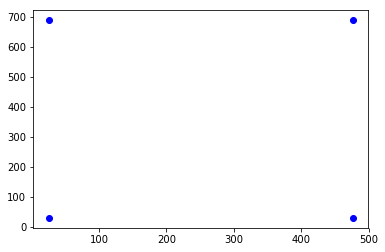

In [12]:
plt.figure()
plt.plot(new_margin[:,0], new_margin[:,1], "bo")
xlim = plt.xlim()
ylim = plt.ylim()
plt.show()

In [13]:
writer = PdfFileWriter()

In [14]:
for i in np.arange(18, 57):
    page = reader.getPage(i)
    page.cropBox.setLowerLeft(tuple(lowerleft + [10, 15])) # for this specific example we manually narrow the margin further
    page.cropBox.setUpperRight(tuple(upperright - [7, 3])) # ...play around these values, in general.
    writer.addPage(page)

In [15]:
outstream = open("mead_cropd_sliced.pdf", 'wb')
writer.write(outstream)
outstream.close()